In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(183, 275, 3)


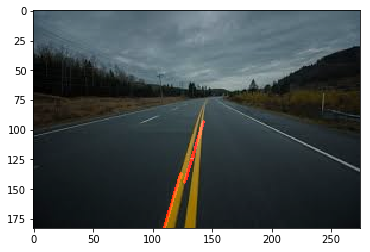

In [33]:
img = cv2.imread("C:\\Users\\KARNDEEP SINGH\\Desktop\\opencv-master\\opencv-master\\samples\\data\\road.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

height = img.shape[0]
width = img.shape[1]

region_of_interest_vertices = [
    (0, height),
    (150, 75),
    (width, height)
    
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
#     channel_size = img.shape[2]
    match_mask_color = (255,)
    cv2.fillPoly(mask,vertices, match_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img




grey_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(grey_image,100,120)
masked_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))

lines = cv2.HoughLinesP(masked_image,rho = 6,theta = np.pi/60, threshold = 160, lines = np.array([]), minLineLength = 40, maxLineGap= 25)

def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image, (x1,y1),(x2,y2), (255,0,0),2)
            
    img = cv2.addWeighted(img,0.8,blank_image, 1,0.0)   
    
    return img
img_with_lines = draw_the_lines(img,lines)
plt.imshow(img_with_lines)
plt.show()